# Projeto
## Gas Sensor Array Drift

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file

import matplotlib.pyplot as plt
import seaborn as sns

### Leitura dos Dados

In [2]:
list_features = []
list_targets = []
for i in range(1, 11):
    X, y = load_svmlight_file(f='../Dataset/batch' + str(i) + '.dat', dtype=np.float64)
    X = pd.DataFrame(X.toarray())
    y = pd.Series(y)
    
    list_features.append(X)
    list_targets.append(y)
    
X = pd.concat(list_features, ignore_index=True)
y = pd.concat(list_targets, ignore_index=True)

In [3]:
print(X.shape)
X.head()

(13910, 128)


0         1          2          3          4          5    \
0  15596.1621  1.868245   2.371604   2.803678   7.512213  -2.739388   
1  26402.0704  2.532401   5.411209   6.509906   7.658469  -4.722217   
2  42103.5820  3.454189   8.198175  10.508439  11.611003  -7.668313   
3  42825.9883  3.451192  12.113940  16.266853  39.910056  -7.849409   
4  58151.1757  4.194839  11.455096  15.715298  17.654915 -11.083364   

         6          7           8         9    ...       118       119  \
0  -3.344671  -4.847512  15326.6914  1.768526  ... -1.071137 -3.037772   
1  -5.817651  -7.518333  23855.7812  2.164706  ... -1.530519 -1.994993   
2  -9.478675 -12.230939  37562.3008  2.840403  ... -2.384784 -2.867291   
3  -9.689894 -11.921704  38379.0664  2.851173  ... -2.607199 -3.058086   
4 -13.580692 -16.407848  51975.5899  3.480866  ... -3.594763 -4.181920   

         120       121       122       123       124       125       126  \
0  3037.0390  3.972203  0.527291  0.728443  1.445783 -0.545079 -0.902241   
1  4176.4453  4.281373  0.980205  1.628050  1.951172 -0.889333 -1.323505   
2  5914.6685  5.396827  1.403973  2.476956  3.039841 -1.334558 -1.993659   
3  6147.4744  5.501071  1.981933  3.569823  4.049197 -1.432205 -2.146158   
4  8158.6449  7.174334  1.993808  3.829303  4.402448 -1.930107 -2.931265   

        127  
0 -2.654529  
1 -1.749225  
2 -2.348370  
3 -2.488957  
4 -4.088756  

[5 rows x 128 columns]

### Análise dos Dados

In [4]:
X.describe()

0             1             2             3             4    \
count   13910.000000  13910.000000  13910.000000  13910.000000  13910.000000   
mean    50435.066174      6.638156     12.936688     18.743953     26.890695   
std     69844.785952     13.486391     17.610061     24.899450     38.107685   
min    -16757.598600      0.088287      0.000100      0.000100      0.000100   
25%      6694.725950      2.284843      1.633350      2.386836      4.967988   
50%     19364.439350      3.871227      4.977123      7.250892     11.680725   
75%     63104.837125      8.400619     17.189165     26.411109     34.843226   
max    670687.347700   1339.879283    167.079751    226.619457    993.605306   

                5             6             7              8             9    \
count  13910.000000  13910.000000  13910.000000   13910.000000  13910.000000   
mean      -9.158655    -14.402383    -59.927598   57340.104585      6.648033   
std       12.729206     21.304606    131.017675   64045.265134     15.585780   
min     -131.332873   -227.627758  -1664.735576  -16119.460900      0.185164   
25%      -11.587169    -17.292559    -48.492764   13287.301875      2.776693   
50%       -3.338700     -4.956917    -14.040088   37764.263200      4.734586   
75%       -1.126897     -1.670327     -5.212213   70300.782575      8.608522   
max       -0.006941     22.201589    115.273147  502202.812500   1672.363221   

       ...           118           119           120           121  \
count  ...  13910.000000  13910.000000  13910.000000  13910.000000   
mean   ...     -9.601927    -19.136500  19688.565373      6.072066   
std    ...      9.220031     26.516679  14281.652395      4.642192   
min    ...    -76.069200   -482.278033  -8297.548800      0.712112   
25%    ...    -13.212575    -22.363498   8837.838750      3.007380   
50%    ...     -7.338850    -13.527887  16313.967300      4.973783   
75%    ...     -3.260080     -7.358031  27009.592425      7.389566   
max    ...      9.270956     11.516418  96706.792700     45.574835   

                122           123           124           125           126  \
count  13910.000000  13910.000000  13910.000000  13910.000000  13910.000000   
mean       7.138634     14.929364     19.090980     -4.901016     -8.167792   
std        5.248573     12.437311     14.391810      4.195360      7.637701   
min        0.003238      0.011488      0.118849    -30.205911    -58.844076   
25%        3.059178      5.407551      8.039227     -6.789599    -11.162406   
50%        5.809107     11.325214     14.560676     -3.881763     -6.305962   
75%       10.222169     21.207572     26.547437     -1.804032     -2.874532   
max       32.203601    297.225880    195.242555     -0.003817      6.851792   

                127  
count  13910.000000  
mean     -16.089791  
std       20.958479  
min     -410.152297  
25%      -18.938690  
50%      -11.747499  
75%       -6.429690  
max        8.357968  

[8 rows x 128 columns]

### Distribuição das médias

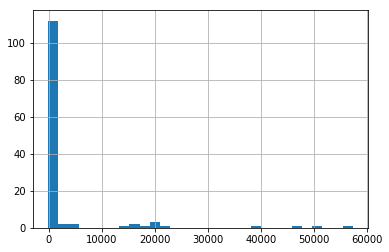

In [5]:
X.mean().hist(bins=30)

### Médias das features

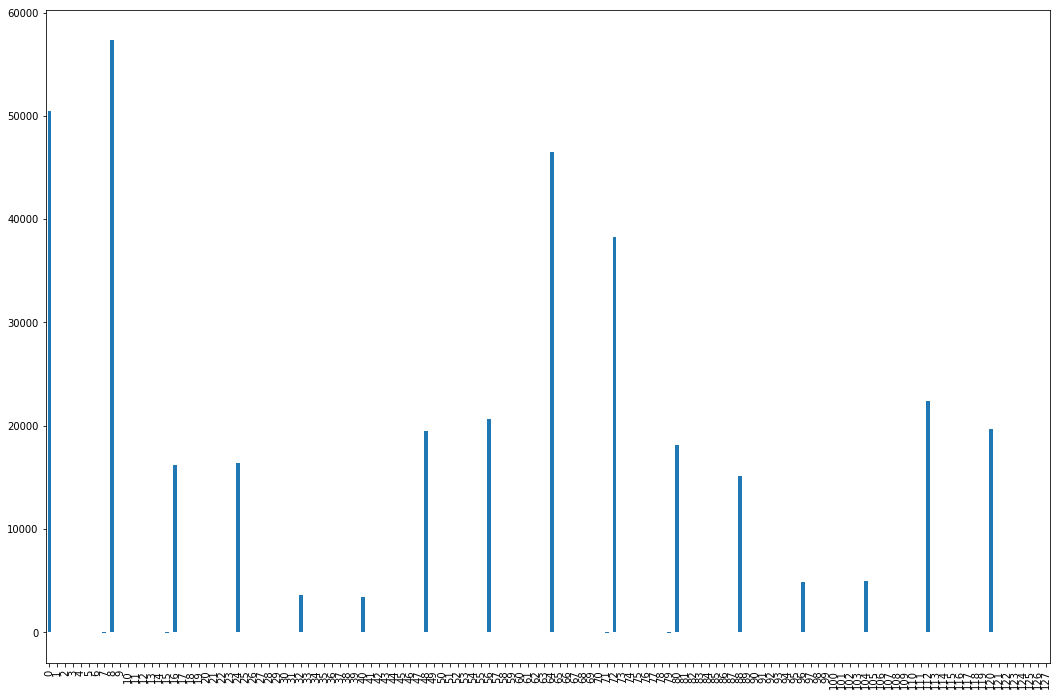

In [6]:
X.mean().plot(kind='bar', figsize=(18,12))

### Correlação das features

In [7]:
correlation = X.corr()
correlation.head()

0         1         2         3         4         5         6    \
0  1.000000  0.197385  0.983710  0.964275  0.852414 -0.951382 -0.882787   
1  0.197385  1.000000  0.221950  0.232599  0.172611 -0.203149 -0.175007   
2  0.983710  0.221950  1.000000  0.992760  0.876528 -0.944900 -0.883919   
3  0.964275  0.232599  0.992760  1.000000  0.900978 -0.927958 -0.878868   
4  0.852414  0.172611  0.876528  0.900978  1.000000 -0.788019 -0.810009   

        7         8         9    ...       118       119       120       121  \
0 -0.677211  0.925908  0.109630  ... -0.467363 -0.318420  0.584990  0.364002   
1 -0.093077  0.199855  0.311957  ... -0.216999 -0.126975  0.265716  0.237435   
2 -0.682115  0.908774  0.125443  ... -0.502787 -0.344844  0.622557  0.389360   
3 -0.685374  0.890924  0.132648  ... -0.517139 -0.369974  0.631761  0.397698   
4 -0.729528  0.810652  0.095071  ... -0.512058 -0.431462  0.597039  0.380994   

        122       123       124       125       126       127  
0  0.364573  0.116011  0.097713 -0.520602 -0.473974 -0.319290  
1  0.276329  0.361492  0.227359 -0.243217 -0.223689 -0.132333  
2  0.419206  0.166136  0.148007 -0.557404 -0.510671 -0.347064  
3  0.440495  0.190516  0.176846 -0.566290 -0.526193 -0.372958  
4  0.433582  0.198069  0.218291 -0.537111 -0.519817 -0.427085  

[5 rows x 128 columns]

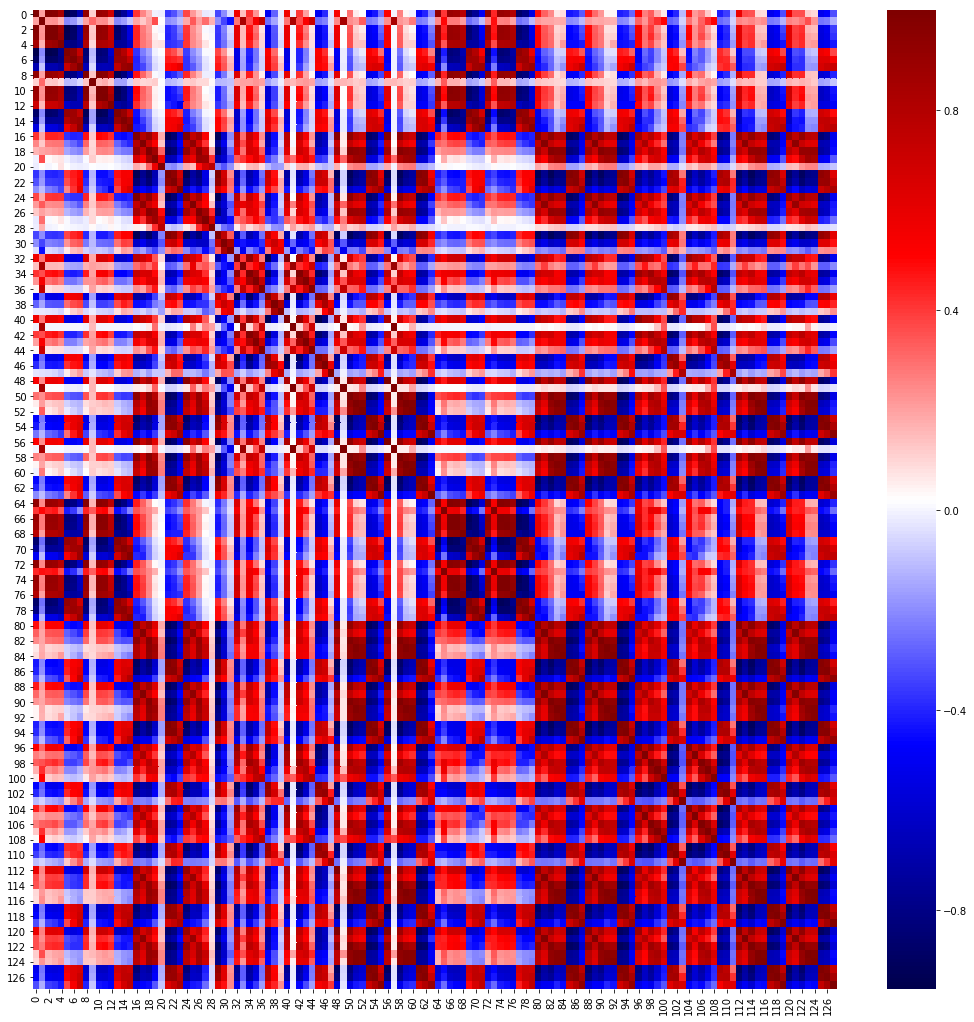

In [8]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(correlation, cmap='seismic')

### Apenas correlações altas (acima de 0.7)

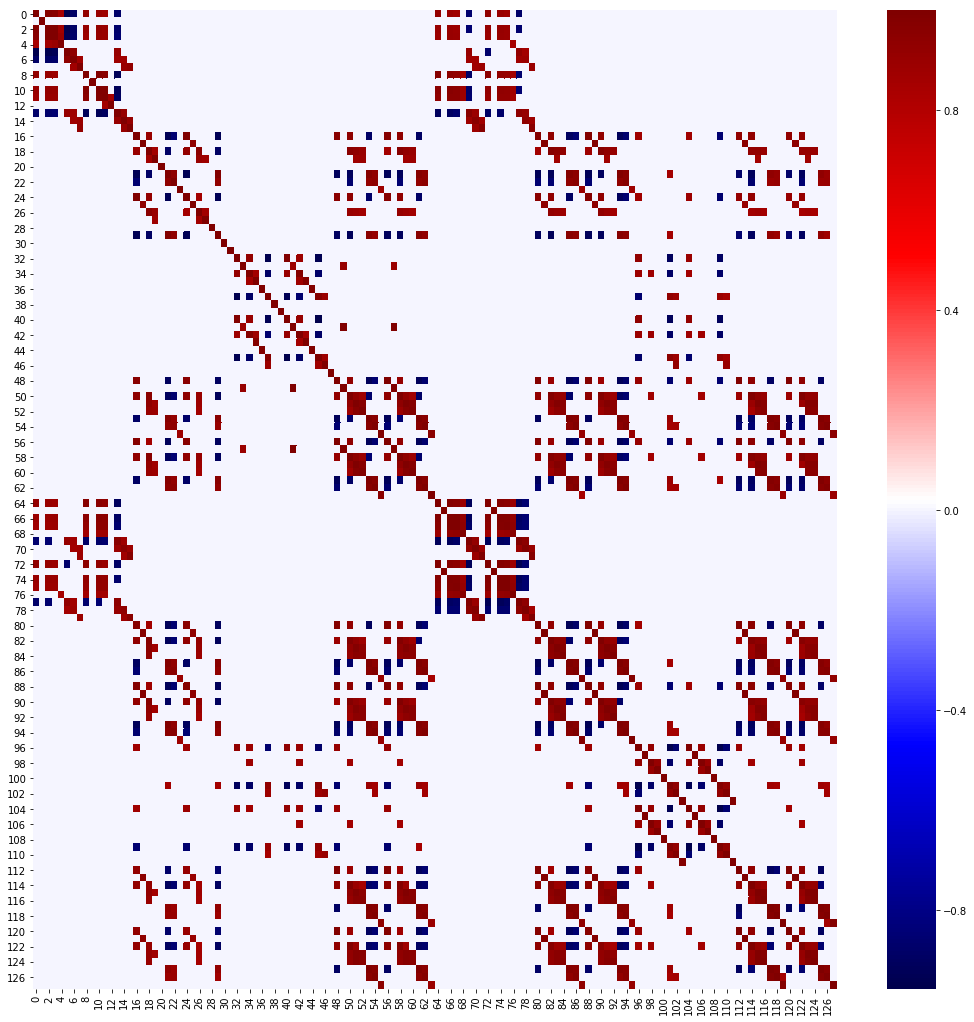

In [9]:
high_correlation = correlation.applymap(lambda x: x if x > 0.85 or x < -0.85 else 0)

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(high_correlation, cmap='seismic') # 'Blues'
plt.savefig('correlation_85.png')

### Série temporal

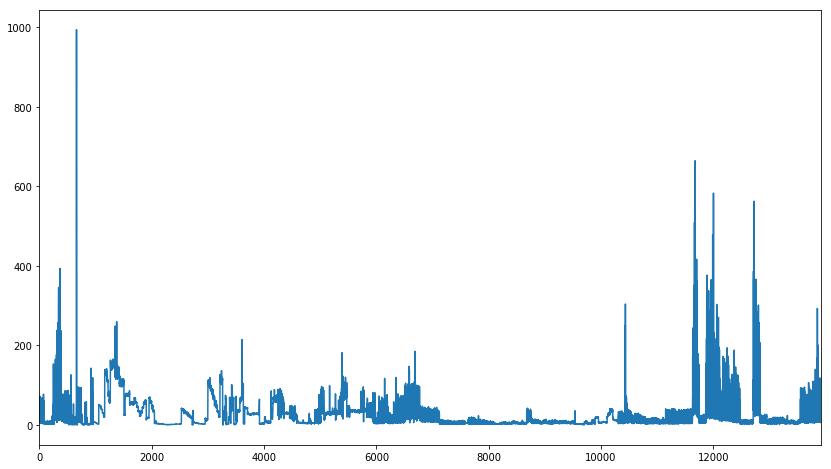

In [10]:
X[4].plot(figsize=(14,8))

### Série temporal apenas para uma classe

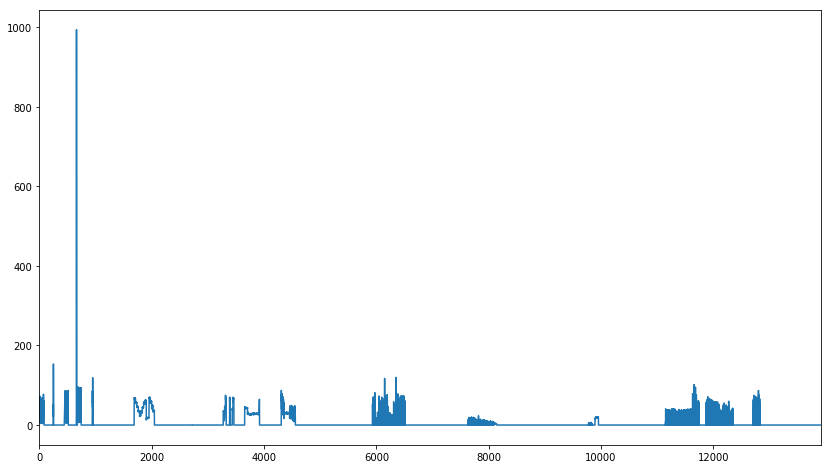

In [11]:
X_4 = X[4].copy()
X_4.loc[~X.index.isin(y[y == 1].index)] = 0
X_4.plot(figsize=(14,8))

### Análise de uma características nos 16 sensores

In [12]:
y.name = 'target'
data = pd.concat([X, y], axis=1)

In [13]:
data.head()

0         1          2          3          4          5  \
0  15596.1621  1.868245   2.371604   2.803678   7.512213  -2.739388   
1  26402.0704  2.532401   5.411209   6.509906   7.658469  -4.722217   
2  42103.5820  3.454189   8.198175  10.508439  11.611003  -7.668313   
3  42825.9883  3.451192  12.113940  16.266853  39.910056  -7.849409   
4  58151.1757  4.194839  11.455096  15.715298  17.654915 -11.083364   

           6          7           8         9  ...       119        120  \
0  -3.344671  -4.847512  15326.6914  1.768526  ... -3.037772  3037.0390   
1  -5.817651  -7.518333  23855.7812  2.164706  ... -1.994993  4176.4453   
2  -9.478675 -12.230939  37562.3008  2.840403  ... -2.867291  5914.6685   
3  -9.689894 -11.921704  38379.0664  2.851173  ... -3.058086  6147.4744   
4 -13.580692 -16.407848  51975.5899  3.480866  ... -4.181920  8158.6449   

        121       122       123       124       125       126       127  \
0  3.972203  0.527291  0.728443  1.445783 -0.545079 -0.902241 -2.654529   
1  4.281373  0.980205  1.628050  1.951172 -0.889333 -1.323505 -1.749225   
2  5.396827  1.403973  2.476956  3.039841 -1.334558 -1.993659 -2.348370   
3  5.501071  1.981933  3.569823  4.049197 -1.432205 -2.146158 -2.488957   
4  7.174334  1.993808  3.829303  4.402448 -1.930107 -2.931265 -4.088756   

   target  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  

[5 rows x 129 columns]

In [14]:
cols_to_plot = [i for i in range(0, 128, 8)]
cols_to_plot.append('target')
cols_to_plot

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 'target']

C:\Users\Milton\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Milton\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


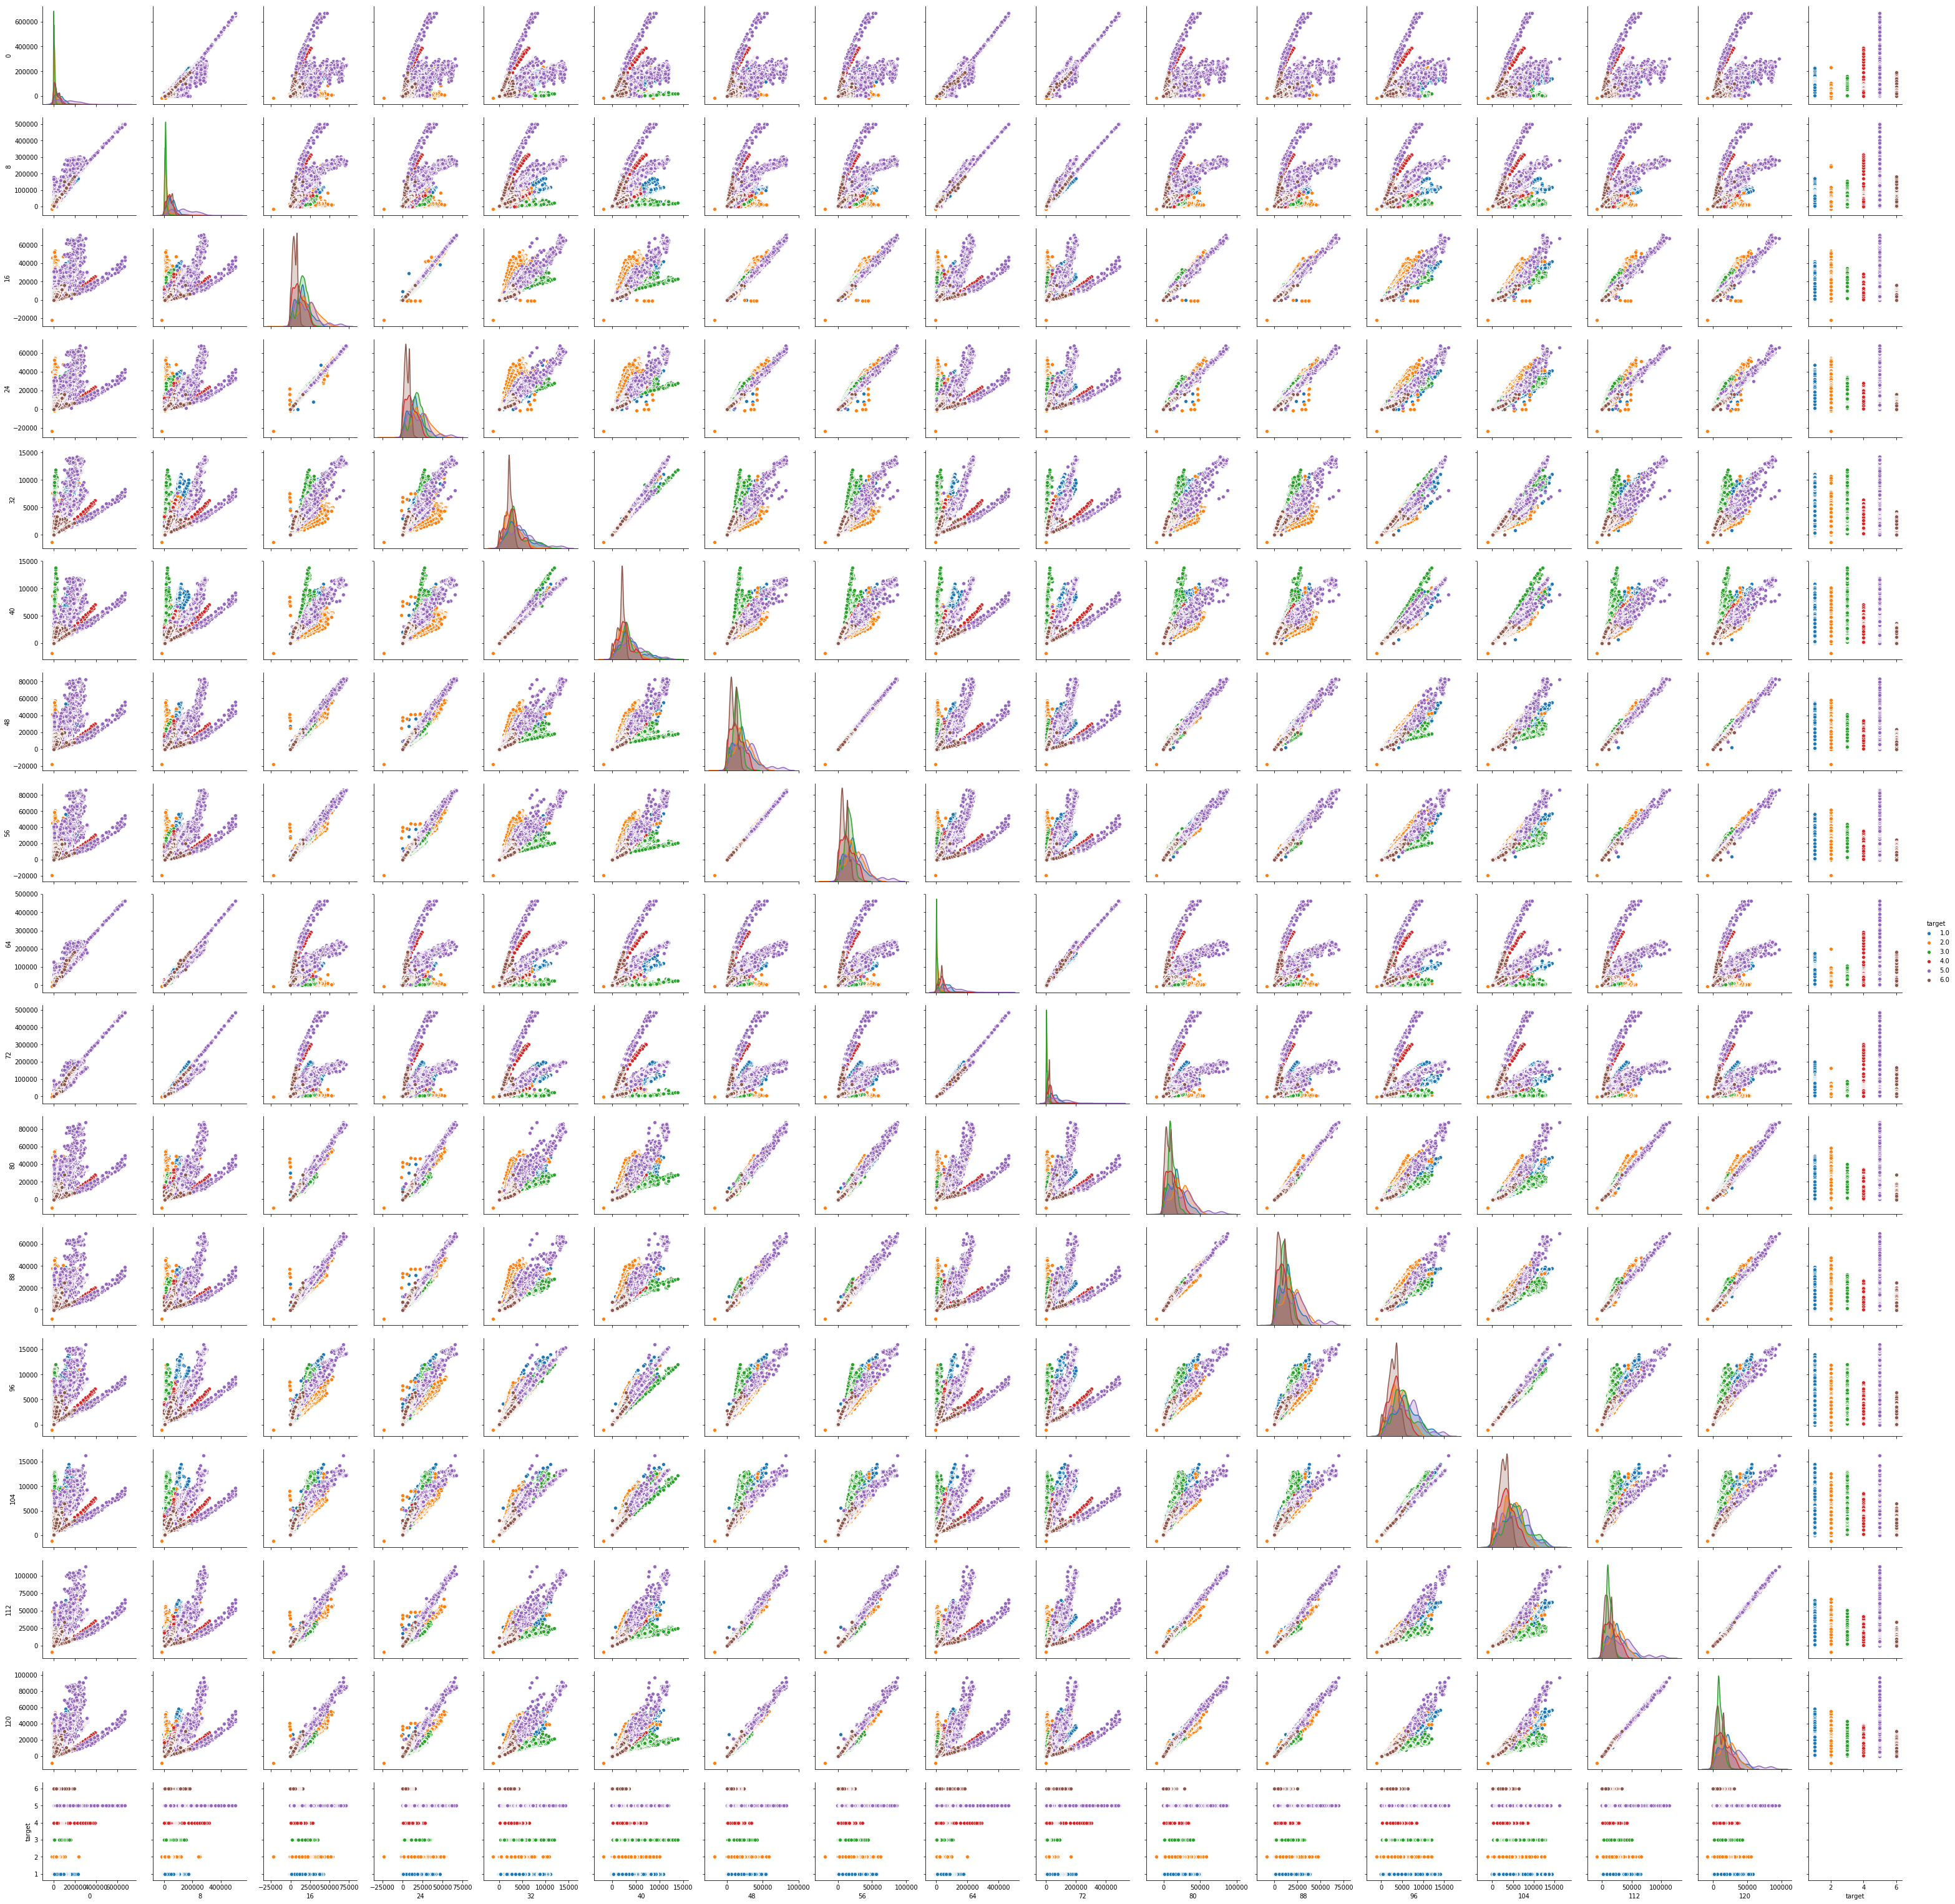

In [15]:
sns.pairplot(data[cols_to_plot], hue='target')
plt.savefig('pairplot.png')

### Outliers

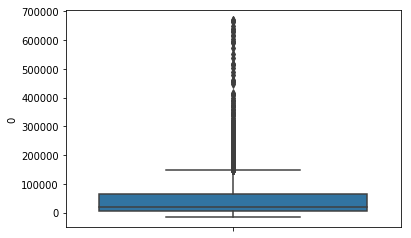

In [16]:
sns.boxplot(X[0], orient='vertical')

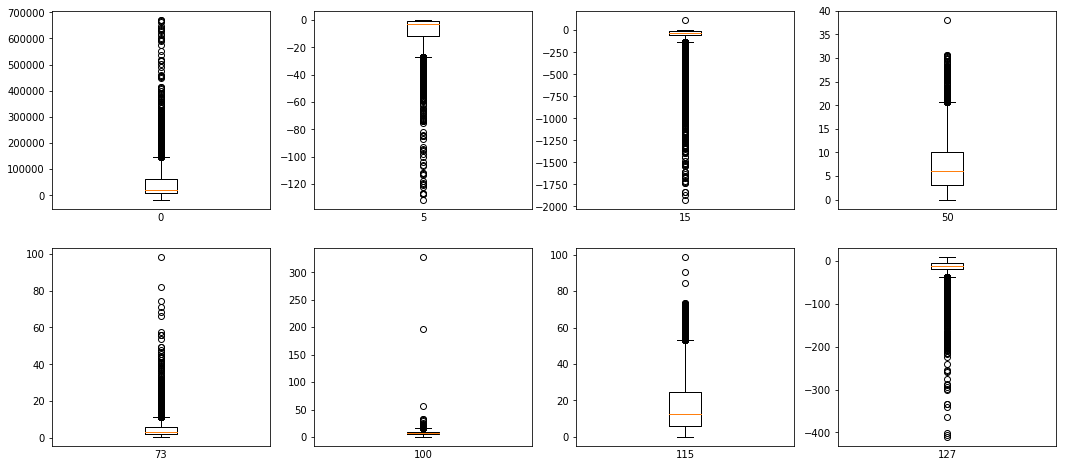

In [17]:
cols_to_plot = [0, 5, 15, 50, 73, 100, 115, 127]
fig, ax = plt.subplots(2,4, figsize=(18,8))

count = 0
for i in range(2):
    for j in range(4):
        ax[i][j].boxplot(X[cols_to_plot[count]])
        ax[i][j].set_xticks([])
        ax[i][j].set_xlabel(cols_to_plot[count])
        count += 1
        
plt.show()

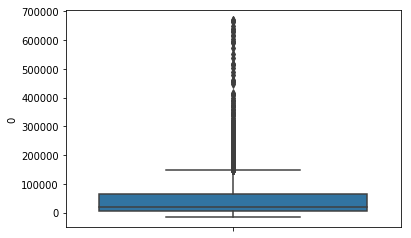

In [18]:
sns.boxplot(X[0], orient='vertical')

In [19]:
def count_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return column[(column < (q1 - 1.5 * iqr)) | (column > (q3 + 1.5 * iqr))].count()

In [20]:
outliers_columns= X.apply(count_outliers)

In [21]:
outliers_columns[outliers_columns == 0]

Series([], dtype: int64)

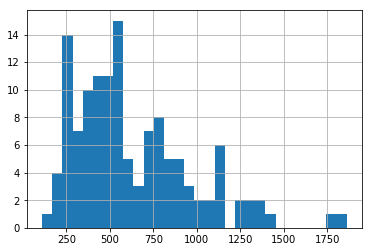

In [22]:
outliers_columns.hist(bins=30)

### Distribuição da classe alvo

In [23]:
y.value_counts()

5.0    3009
2.0    2926
1.0    2565
4.0    1936
6.0    1833
3.0    1641
Name: target, dtype: int64

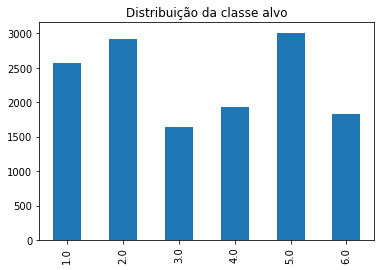

In [24]:
y.value_counts().sort_index().plot(kind='bar', title='Distribuição da classe alvo')

### Análise da distribuição dos dados no tempo (meses)

In [25]:
examples_by_month = [248, 197, 217, 261, 20, 15, 731, 506, 526, 554, 113, 48, 197, 20, 3, 652, 1625, 3613, 163, 131, 54, 416, 3600]

In [26]:
examples_by_month_complete = [0]
for i, j in enumerate(examples_by_month):
    if i == 0:
        examples_by_month_complete.append(j-1)
    else:
        examples_by_month_complete.append(j+examples_by_month_complete[i])

In [27]:
months = [1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 30, 36]

In [28]:
X = X.reset_index()
X['month'] = pd.cut(X['index'], bins=examples_by_month_complete, labels=months, include_lowest=True)

In [29]:
X.drop('index', axis=1, inplace=True)

### Quantidade de exemplos por mês 

In [30]:
X['month'].value_counts().sort_index()

1      248
2      197
3      217
4      261
8       20
9       15
10     731
11     506
12     526
13     554
14     113
15      48
16     197
17      20
18       3
19     652
20    1625
21    3613
22     163
23     131
24      54
30     416
36    3600
Name: month, dtype: int64

### Quantidade de gases por mês

In [48]:
gass_count_by_month = []
for idx, rows in X.groupby('month'):
    count_gass = y.loc[rows.index].value_counts()
    count_gass.name = idx
    gass_count_by_month.append(count_gass)

In [49]:
df_gass_month = pd.concat(gass_count_by_month, axis=1).fillna(0).T

In [50]:
df_gass_month

1.0    2.0    3.0    4.0    5.0    6.0
1    84.0   88.0   76.0    0.0    0.0    0.0
2     6.0   10.0    7.0   30.0   70.0   74.0
3    70.0  140.0    0.0    0.0    7.0    0.0
4    82.0  170.0    0.0    4.0    0.0    5.0
8     0.0   20.0    0.0    0.0    0.0    0.0
9    11.0    4.0    0.0    0.0    0.0    0.0
10    1.0    0.0  100.0  105.0  525.0    0.0
11  360.0  146.0    0.0    0.0    0.0    0.0
12    0.0  334.0    0.0  192.0    0.0    0.0
13    5.0   10.0  216.0   48.0  275.0    0.0
14   52.0   43.0    0.0   18.0    0.0    0.0
15   12.0    0.0   12.0   12.0   12.0    0.0
16   28.0   40.0   20.0   46.0   63.0    0.0
17    0.0   20.0    0.0    0.0    0.0    0.0
18    0.0    3.0    0.0    0.0    0.0    0.0
19  264.0  100.0  110.0   29.0  140.0    9.0
20  250.0  451.0    0.0    0.0  466.0  458.0
21  649.0  662.0  360.0  744.0  630.0  568.0
22    0.0    0.0   25.0   15.0  123.0    0.0
23   30.0   30.0   15.0   18.0   20.0   18.0
24    0.0    0.0    0.0   25.0   28.0    1.0
30   61.0   55.0  100.0   50.0   50.0  100.0
36  600.0  600.0  600.0  600.0  600.0  600.0

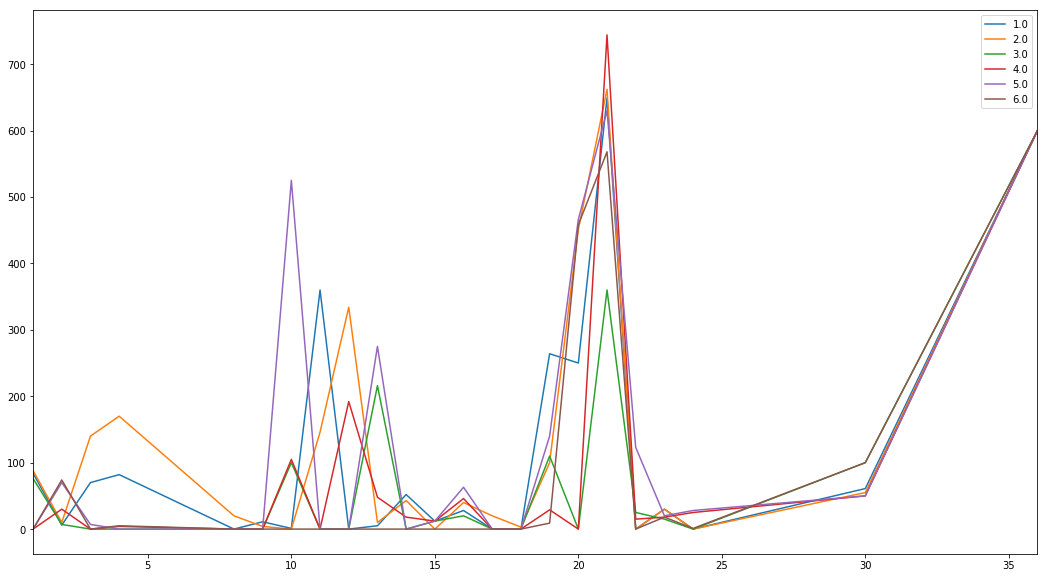

In [56]:
df_gass_month.plot(figsize=(18,10))
plt.savefig('gases_tempo_todos.png')

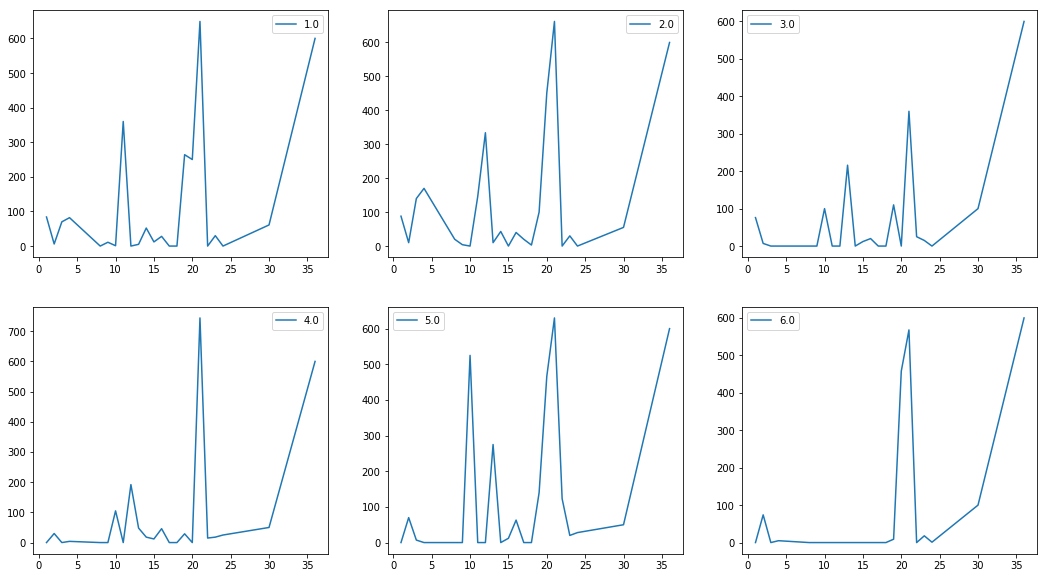

In [55]:
fig, ax = plt.subplots(2,3, figsize=(18,10))
ax[0][0].plot(df_gass_month[1])
ax[0][1].plot(df_gass_month[2])
ax[0][2].plot(df_gass_month[3])
ax[1][0].plot(df_gass_month[4])
ax[1][1].plot(df_gass_month[5])
ax[1][2].plot(df_gass_month[6])

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()

plt.savefig('gases_tempo.png')

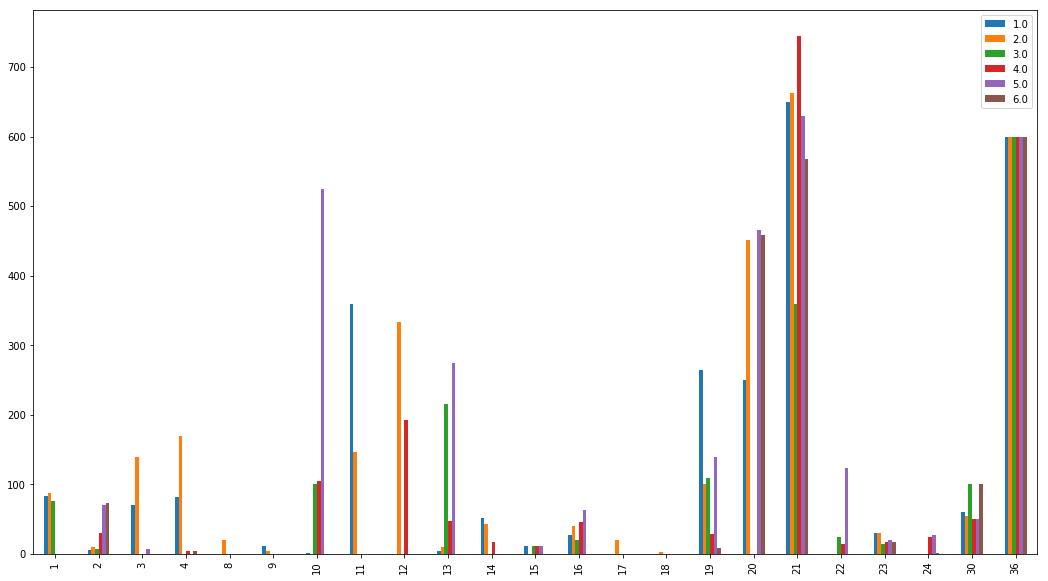

In [54]:
df_gass_month.plot(kind='bar', figsize=(18,10))